In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:

def load_dataset():
  X, y = load_iris(return_X_y=True)
  X = X[y!=2]
  y = y[y!=2]
  return X,y

X, y = load_dataset()
print(X.shape ,y.shape )


(100, 4) (100,)


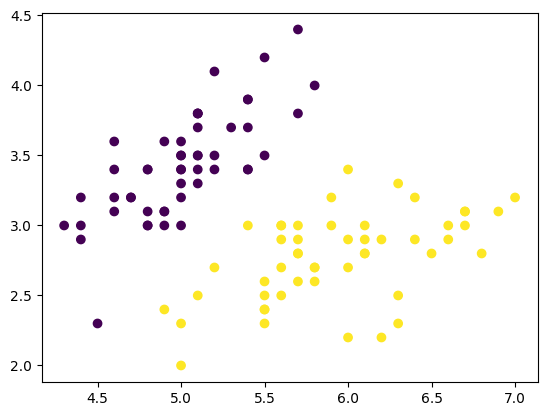

In [5]:

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [6]:

class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
      super(LogisticRegressTorch, self).__init__()
      self.linear = nn.Linear(n_features, 1)
      self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      return torch.sigmoid(self.linear(x))



In [7]:

class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [8]:

dataset = IrisTorch(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [9]:

train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [10]:

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [11]:

n_features = X.shape[1]
model = LogisticRegressTorch(n_features)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:

n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 1.0009, Test Loss: 0.9623, Test Accuracy: 0.4333
Epoch 2/200, Train Loss: 0.9499, Test Loss: 0.9178, Test Accuracy: 0.1333
Epoch 3/200, Train Loss: 0.9186, Test Loss: 0.9172, Test Accuracy: 0.3333
Epoch 4/200, Train Loss: 0.9112, Test Loss: 0.8927, Test Accuracy: 0.3000
Epoch 5/200, Train Loss: 0.8881, Test Loss: 0.8200, Test Accuracy: 0.0000
Epoch 6/200, Train Loss: 0.8458, Test Loss: 0.8128, Test Accuracy: 0.0000
Epoch 7/200, Train Loss: 0.8359, Test Loss: 0.8179, Test Accuracy: 0.0000
Epoch 8/200, Train Loss: 0.8290, Test Loss: 0.7870, Test Accuracy: 0.0333
Epoch 9/200, Train Loss: 0.8091, Test Loss: 0.7665, Test Accuracy: 0.3667
Epoch 10/200, Train Loss: 0.7962, Test Loss: 0.7511, Test Accuracy: 0.5333
Epoch 11/200, Train Loss: 0.7863, Test Loss: 0.7417, Test Accuracy: 0.5333
Epoch 12/200, Train Loss: 0.7758, Test Loss: 0.7278, Test Accuracy: 0.5333
Epoch 13/200, Train Loss: 0.7692, Test Loss: 0.7187, Test Accuracy: 0.5333
Epoch 14/200, Train Loss: 0.7560, 

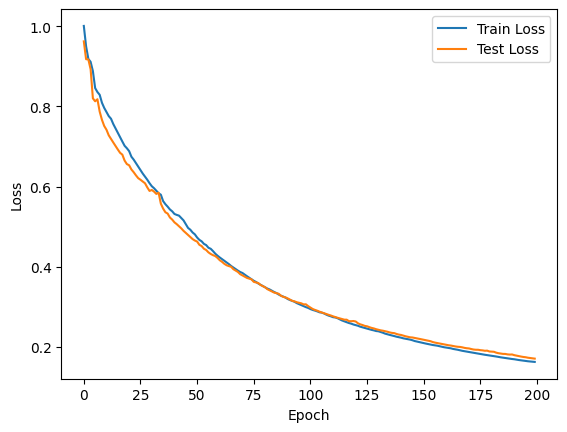

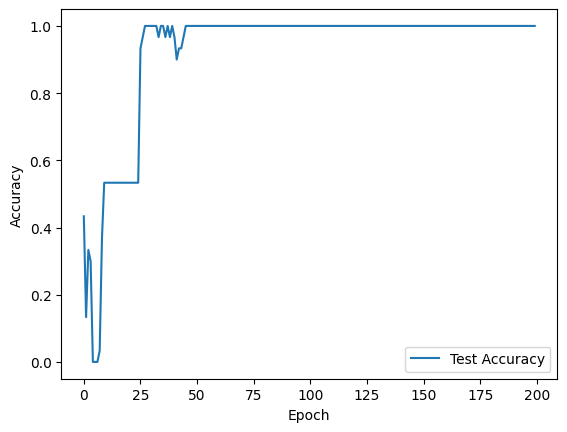

In [14]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()